# Research Notebook
## Zachary Doucet                                        
## Date: 26 January 2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

- Attended our weekly meeting to disucuss progress on our first task which was to write a python program to solve the TOV       equation for a dark star with no ordinary matter.
- Took Feedback from the meeting on my code and continued to work on it.

## Motivation:

- To learn how to solve the TOV equation with an EOS which Dr. Schaffner-Bielich discussed in a previous paper [1]. The goal of this practice is to be able to extend this code in future weeks to solve the two fluid case with Dark matter and ordinary matter.

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

I had to take a look at Dr. Schaffner-Bielich's paper [1] to see the equations and how the parameters are defined. From here I wrote a program in python to try to solve TOV equation with the equation of state in an identical manner as the second python excersize which we did on Neutron stars, This time however for a dark star. The equation of state in addition to the rest of the system which is defined as follows.

EOS: $\epsilon = \sqrt{\frac{p}{\epsilon_0}} + 3p$  
TOV: $\frac{dp}{dr} = \frac{-G}{r^2}(\epsilon+\frac{p}{c^2})(4\pi r^3\frac{p}{c^2})(\frac{1-2Gm}{rc^2})^{-1}$  
Mass: $\frac{dm}{dr} = 4\pi r^2\frac{\epsilon}{c^2}$

Solving this system and plotting the mass as a function of radius was done with the following code:

"""  
the numbers in this code are all in natural units.  
"""  

import numpy as np  
from scipy.integrate import solve_ivp  
import matplotlib.pyplot as plt  

# Constants  
m_b = 1 # GeV, boson mass  
l = 1 # Coupling strength  
e_0 = l * m_b**4 # GeV^4, initial energy density  
G = 1.19e-19 # GeV, Gravitational constant  
c = 1 # Speed of light  

# Define the system of equations
def TOV(r, y):  
    """  
    Herre I have removed the c from the equations as it is 1.  
    """  
    p, m = y  
    if p <= 0: # Stop integration if pressure drops below zero  
        return [0, 0]  

    e = e_0*(p/e_0)**0.5 + 3*p # EOS  
    dp_dr = (-G/(r**2))*(e + p)*(4*np.pi*(r**3)*p)*(1 - (2*G*m)/r)**-1  
    dm_dr = 4*np.pi*(r**2)*e  
    return [dp_dr, dm_dr]  


# initial conditions  
r0 = 1e-7 # nonzero initial radius to avoid division by zero  
p0 = 1e-5 # initial pressure  
m0 = 0 # Initial mass  
y0 = [p0, m0]  # Vector containing initial conditions  

# solve the ODEs  
r_max = 50 # Maximum radius  
solution = solve_ivp(TOV, [r0, r_max], y0, method='RK45', dense_output=True, max_step=0.1)  

# extract results  
r = solution.t  
p = solution.y[0]  
m = solution.y[1]  

# filter results  
valid_indices = p > 0  
r = r[valid_indices]  
m = m[valid_indices]  

# plot mass vs radius  
plt.plot(r, m, label='M(r)')  
plt.xlabel('Radius (natural units)')  
plt.ylabel('Mass (natural units)')  
plt.title('Radius Vs. Mass')  
plt.grid()  
plt.legend()  
plt.show()  


This code is rather simple as it uses solve_ivp from the scipy.integrate library, because of this I can just define my constant, define my system of equations, then use this function to solve. after solving I extract and filter the results, then finally plot the mass as a function of radius.

These results have been verbally shared with a group mate, however our meeting is tomorrow and results will be shown and formally discussed then.




# 3: So what? (What does it mean?)

in the previous code, I got an exponential curve which at this time I am not confident is correct as I believe that the mass of the star should be bounded above, however the general trend of increasing mass with increasing radius makes sense. I will note, before I recieved feedback about the units which I was working with and how I implemented the solution to this system in python I obtained a constant radius with increasing mass, which made no sense as their is more than one possible radius this star can have. This issue was a mistake in the initial values as it did not allow the system to evolve as an initial boson mass was too small. These two figures are provided below

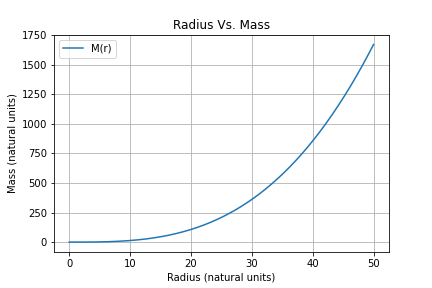
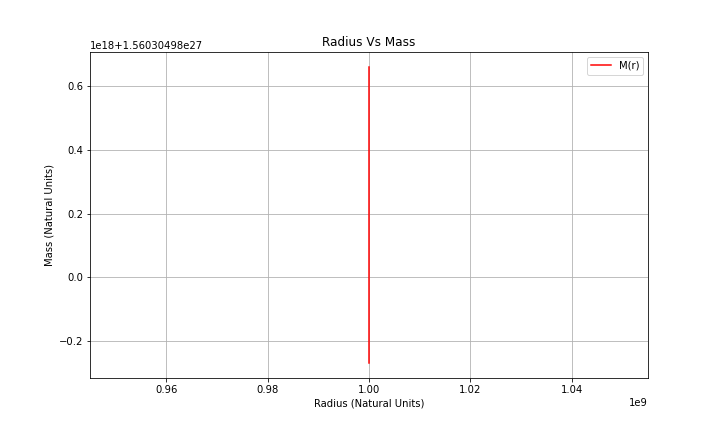

(Note these plots seem to be rather finicky as they will display the photo one time I run this cell but not the next time then randomly start working again, so I am hoping the submission works)

This activity was important for the progress of our project as being able to solve this system is foundational to what is to come, for example when we do the two fluid case which includes ordinary matter. I would not say this week was successful as I do not believe this program correctly solves the system of equations, however our group meets tomorrow and we will disuss our codes and how to finish the program to work correctly. 

# 4. Now what? (What's next?)
## Plan for the next week

I did not achieve my inteded goal this week in solving the previous system of equations correctly. I need more information to achieve this goal as I am not sure what I am doing wrong. I have discussed with a groupmate, however he got the same trend I did and seems to be having the same issue. In tomorrows group meeting, which is meant to discuss our results and how to move forward, I intend to ask the rest of the group and maybe discover the bug in my code. 

For next week I intend to take feedback on my code in the group meeting and 
1. fix my program
2. study whatever it is that I made a mistake on as I clearly lack an understanding of something somewhere, just not sure where yet
3. potentially start on the two fluid case which includes dark matter and ordinary matter.

# 5. Bibliography

Your references here

[1]     **S. L. Pitz and J. Schaffner-Bielich,** "Generating ultra-compact neutron stars with bosonic dark matter," *arXiv preprint*, arXiv:2408.13157 [astro-ph.HE], Aug. 2024.
